In [1]:
!pip install scipy
!pip install --upgrade scipy


  Using cached scipy-1.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 29.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.1 which is incompatible.


In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Crash_Reporting_-_Incidents_Data.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Number of Lanes,Direction,Distance,Distance Unit,...,Driver Substance Abuse,First Harmful Event,Second Harmful Event,Junction,Intersection Type,Road Alignment,Road Condition,Road Division,Latitude,Longitude
0,Montgomery County Police,Injury Crash,3/4/2019 8:41,No,Maryland (State),West,2.0,East,200.0,FEET,...,NONE DETECTED,OTHER VEHICLE,NaN,NON INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.113113,-77.057592
1,Montgomery County Police,Property Damage Crash,6/4/2016 19:14,Yes,County,East,1.0,East,500.0,FEET,...,UNKNOWN,PARKED VEHICLE,OTHER VEHICLE,NON INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",38.982443,-77.079235
2,MONTGOMERY,Property Damage Crash,8/18/2015 23:00,No,County,South,2.0,South,30.0,FEET,...,NONE DETECTED,PARKED VEHICLE,NaN,NON INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.189845,-77.230325
3,Montgomery County Police,Injury Crash,8/24/2023 7:46,No,Maryland (State),West,4.0,West,50.0,FEET,...,NONE DETECTED,NaN,NaN,NON INTERSECTION,NaN,CURVE LEFT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.041698,-77.050125
4,Rockville Police Departme,Property Damage Crash,8/12/2023 16:28,Yes,NaN,South,3.0,South,40.0,FEET,...,NaN,OTHER VEHICLE,OTHER VEHICLE,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.084720,-77.148200


In [3]:
# Calculate the number and percentage of missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine into a single DataFrame for better visibility
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})

# Display columns with missing values
missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Missing Percentage
Route Type,271,0.866562
Lane Direction,1,0.003198
Number of Lanes,1,0.003198
Direction,6,0.019186
Distance,157,0.502031
Distance Unit,1,0.003198
Road Grade,241,0.770633
At Fault,1,0.003198
Collision Type,136,0.434880
Weather,2385,7.626387


In [4]:
# Check the data types and unique values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31273 entries, 0 to 31272
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Agency Name             31273 non-null  object 
 1   ACRS Report Type        31273 non-null  object 
 2   Crash Date/Time         31273 non-null  object 
 3   Hit/Run                 31273 non-null  object 
 4   Route Type              31002 non-null  object 
 5   Lane Direction          31272 non-null  object 
 6   Number of Lanes         31272 non-null  float64
 7   Direction               31267 non-null  object 
 8   Distance                31116 non-null  float64
 9   Distance Unit           31272 non-null  object 
 10  Road Grade              31032 non-null  object 
 11  At Fault                31272 non-null  object 
 12  Collision Type          31137 non-null  object 
 13  Weather                 28888 non-null  object 
 14  Surface Condition       30435 non-null

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Agency Name,31273,10,Montgomery County Police,25447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACRS Report Type,31273,3,Property Damage Crash,19885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crash Date/Time,31273,30978,3/5/2019 8:57,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hit/Run,31273,2,No,26393,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route Type,31002,11,Maryland (State),14300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lane Direction,31272,5,North,9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Lanes,31272.0,NaN,NaN,NaN,2.331447,1.229137,0.0,2.0,2.0,3.0,99.0
Direction,31267,5,North,12872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,31116.0,NaN,NaN,NaN,62.59269,135.720328,0.0,0.0,0.1,50.0,1000.0
Distance Unit,31272,3,FEET,28962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Fill missing values for categorical columns with the most frequent value (mode)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    most_frequent = df[col].mode()[0]
    df[col].fillna(most_frequent, inplace=True)

<ipython-input-6-842b8c97cf43>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_frequent, inplace=True)


In [7]:
# Fill missing values for numerical columns with their median
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [8]:
# Verify no missing values remain
df.isnull().sum()

,0
Agency Name,0
ACRS Report Type,0
Crash Date/Time,0
Hit/Run,0
Route Type,0
Lane Direction,0
Number of Lanes,0
Direction,0
Distance,0
Distance Unit,0


In [9]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [10]:
# Standardize text columns by converting to uppercase
for col in categorical_cols:
    df[col] = df[col].str.upper()

In [11]:
# Identify potential outliers in numerical columns using IQR
numerical_summary = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    numerical_summary[col] = outliers

# Display columns with potential outliers
numerical_summary

{'Number of Lanes': 1181, 'Distance': 4291, 'Latitude': 61, 'Longitude': 100}

In [12]:
# Cap outliers using the IQR method
for col in ['Number of Lanes', 'Distance', 'Latitude', 'Longitude']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Verify the results
df[['Number of Lanes', 'Distance', 'Latitude', 'Longitude']].describe()

,Number of Lanes,Distance,Latitude,Longitude
count,31272.000000,31272.000000,31272.000000,31272.000000
mean,2.293921,31.994076,39.084544,-77.113511
std,0.985662,46.987897,0.071939,0.095786
min,0.500000,0.000000,38.852180,-77.416715
25%,2.000000,0.000000,39.025211,-77.190487
50%,2.000000,0.100000,39.075914,-77.105996
75%,3.000000,50.000000,39.140565,-77.039668
max,4.500000,125.000000,39.313597,-76.813440


In [13]:
# Convert 'Crash Date/Time' to datetime format
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'], errors='coerce')

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check for any invalid date/time entries
invalid_dates = df['crash_date/time'].isnull().sum()

# Display the result
print(f"Invalid date/time entries: {invalid_dates}")

# Final check of the cleaned dataset
df.info()


Invalid date/time entries: 0
<class 'pandas.core.frame.DataFrame'>
Index: 31272 entries, 0 to 31272
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   agency_name             31272 non-null  object        
 1   acrs_report_type        31272 non-null  object        
 2   crash_date/time         31272 non-null  datetime64[ns]
 3   hit/run                 31272 non-null  object        
 4   route_type              31272 non-null  object        
 5   lane_direction          31272 non-null  object        
 6   number_of_lanes         31272 non-null  float64       
 7   direction               31272 non-null  object        
 8   distance                31272 non-null  float64       
 9   distance_unit           31272 non-null  object        
 10  road_grade              31272 non-null  object        
 11  at_fault                31272 non-null  object        
 12  collision_type        

In [14]:
# Convert distance to miles and combine into one column
def convert_to_miles(row):
    if row['distance_unit'] == 'FEET':
        return row['distance'] / 5280
    elif row['distance_unit'] == 'MILE':
        return row['distance']
    else:
        return None

In [15]:
# Apply the conversion
df['distance_miles'] = df.apply(convert_to_miles, axis=1)

# Drop the original columns
df.drop(['distance', 'distance_unit'], axis=1, inplace=True)

# Check the result
df[['distance_miles']].head()

,distance_miles
0,0.023674
1,0.023674
2,0.005682
3,0.009470
4,0.007576


In [16]:
from sklearn.preprocessing import StandardScaler
import re

# Standardizing Numerical Features
def standardize_numerical_columns(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    print("Numerical columns standardized.")
    return df

# Custom Rule-Based Cleaning (example: replace 'UNK' or similar with 'UNKNOWN')
def custom_cleaning_rules(df):
    # Custom rule for 'weather' column - replace any "UNK" or "UNKNOWN" with "CLEAR"
    if 'weather' in df.columns:
        df['weather'] = df['weather'].replace({'UNK': 'CLEAR', 'UNKNOWN': 'CLEAR'})

    # Custom rule for 'collision_type' - ensure only known categories remain
    known_collision_types = {'SAME DIR REAR END', 'ANGLE', 'HEAD ON', 'SIDESWIPE', 'FIXED OBJECT'}
    if 'collision_type' in df.columns:
        df['collision_type'] = df['collision_type'].apply(lambda x: x if x in known_collision_types else 'OTHER')

    print("Custom rule-based cleaning applied.")
    return df

# String Cleaning (remove special characters, extra spaces, standardize case)
def clean_text_columns(df):
    text_cols = df.select_dtypes(include=['object']).columns
    for col in text_cols:
        df[col] = df[col].str.upper()                                      # Convert to uppercase
        df[col] = df[col].str.strip()                                      # Remove leading/trailing spaces
        df[col] = df[col].apply(lambda x: re.sub(r'[^A-Z0-9\s]', '', x))  # Remove special characters
    print("Text columns cleaned.")
    return df

# Apply the cleaning steps
df = standardize_numerical_columns(df)
df = custom_cleaning_rules(df)
df = clean_text_columns(df)

# Final verification
print(df.info())
print(df.head())


Numerical columns standardized.
Custom rule-based cleaning applied.
Text columns cleaned.
<class 'pandas.core.frame.DataFrame'>
Index: 31272 entries, 0 to 31272
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   agency_name             31272 non-null  object        
 1   acrs_report_type        31272 non-null  object        
 2   crash_date/time         31272 non-null  datetime64[ns]
 3   hit/run                 31272 non-null  object        
 4   route_type              31272 non-null  object        
 5   lane_direction          31272 non-null  object        
 6   number_of_lanes         31272 non-null  float64       
 7   direction               31272 non-null  object        
 8   road_grade              31272 non-null  object        
 9   at_fault                31272 non-null  object        
 10  collision_type          31272 non-null  object        
 11  weather              

In [17]:
# Replace 'UNKNOWN' in first_harmful_event with the value from second_harmful_event
df['first_harmful_event'] = df.apply(
    lambda row: row['second_harmful_event'] if row['first_harmful_event'] == 'UNKNOWN' else row['first_harmful_event'],
    axis=1
)
df['first_harmful_event'].replace('UNKNOWN', 'OTHER', inplace=True)

# Verify the changes
df['first_harmful_event'].value_counts()


<ipython-input-17-b268bde598f8>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['first_harmful_event'].replace('UNKNOWN', 'OTHER', inplace=True)


,count
first_harmful_event,
OTHER VEHICLE,23000
FIXED OBJECT,3647
PARKED VEHICLE,1916
PEDESTRIAN,1078
OFF ROAD,377
ANIMAL,351
BICYCLE,303
OTHER OBJECT,211
OVERTURN,105


In [18]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = '/content/drive/MyDrive/Colab Notebooks/cleaned_crash_data.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")

Cleaned dataset saved to: /content/drive/MyDrive/Colab Notebooks/cleaned_crash_data.csv


In [19]:
# Get the count of non-null values for each column
column_counts = df.count()

# Display the counts for each column
print(column_counts)

agency_name               31272
acrs_report_type          31272
crash_date/time           31272
hit/run                   31272
route_type                31272
lane_direction            31272
number_of_lanes           31272
direction                 31272
road_grade                31272
at_fault                  31272
collision_type            31272
weather                   31272
surface_condition         31272
light                     31272
traffic_control           31272
driver_substance_abuse    31272
first_harmful_event       31272
second_harmful_event      31272
junction                  31272
intersection_type         31272
road_alignment            31272
road_condition            31272
road_division             31272
latitude                  31272
longitude                 31272
distance_miles            31093
dtype: int64


In [20]:
print(df.columns.tolist())

['agency_name', 'acrs_report_type', 'crash_date/time', 'hit/run', 'route_type', 'lane_direction', 'number_of_lanes', 'direction', 'road_grade', 'at_fault', 'collision_type', 'weather', 'surface_condition', 'light', 'traffic_control', 'driver_substance_abuse', 'first_harmful_event', 'second_harmful_event', 'junction', 'intersection_type', 'road_alignment', 'road_condition', 'road_division', 'latitude', 'longitude', 'distance_miles']


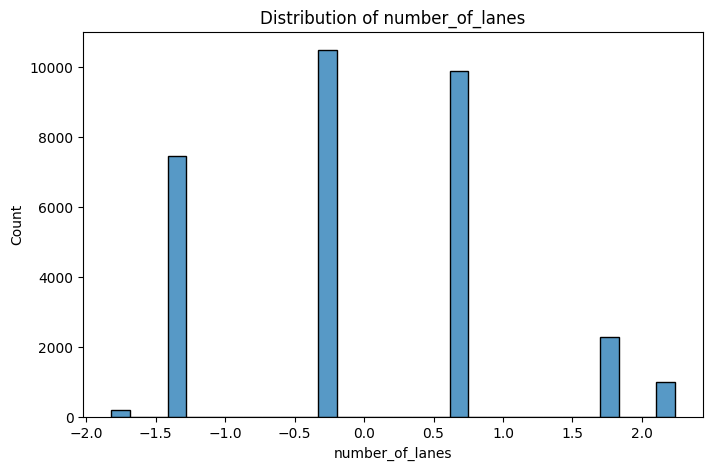

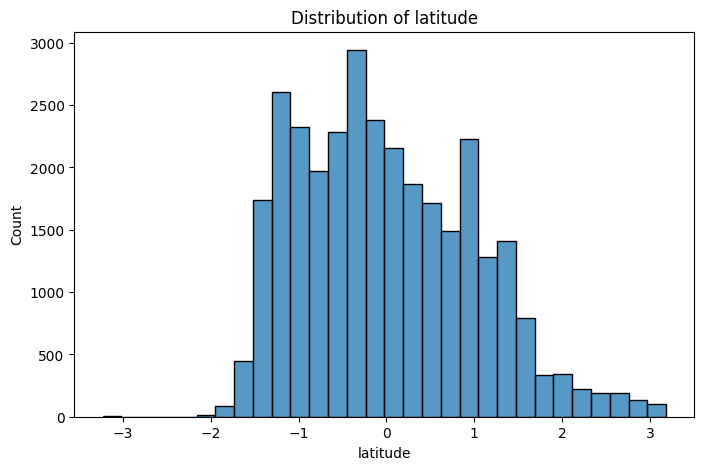

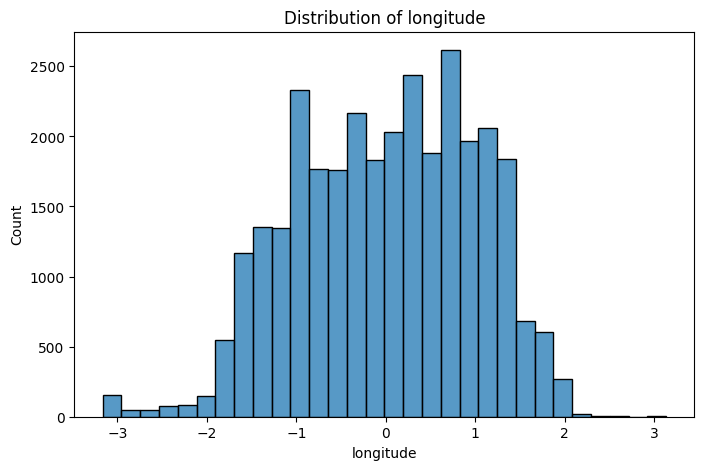

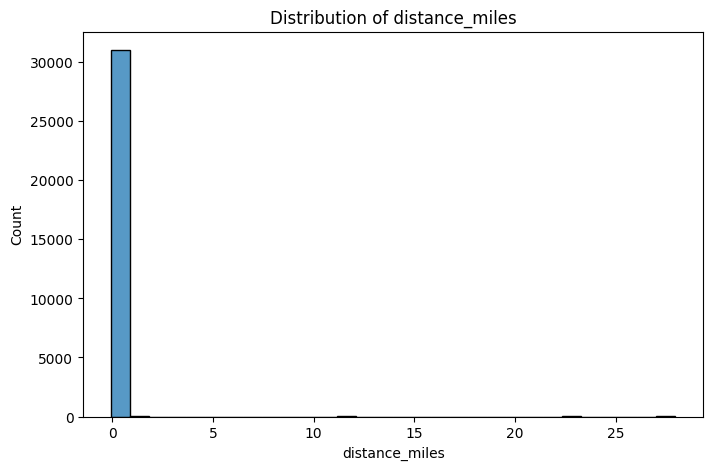

In [21]:
# Plot distribution for numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_numerical_cols = df.select_dtypes(include=['number']).columns
for col in cleaned_numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=False, bins=30)  # Disable KDE for performance
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

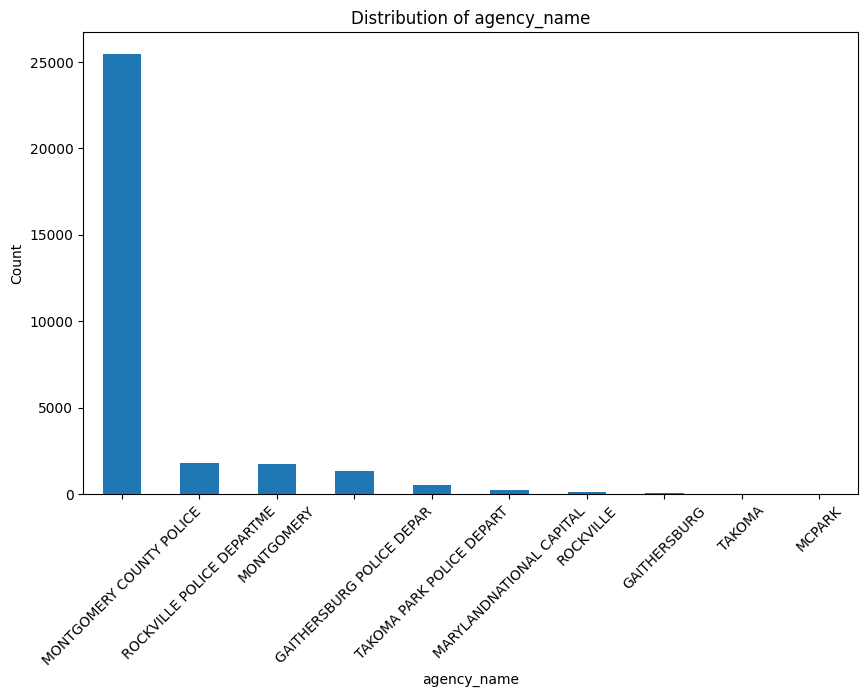

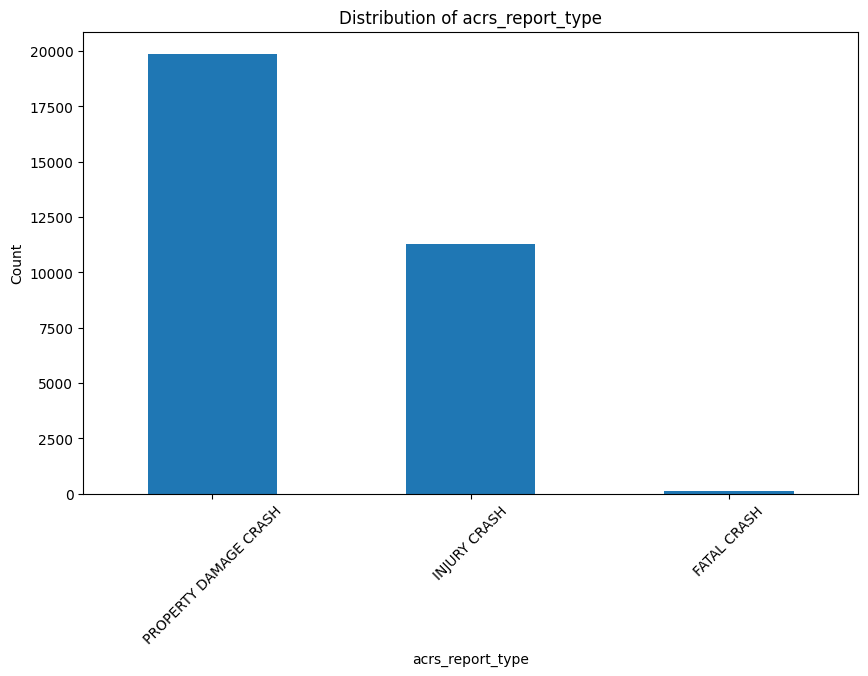

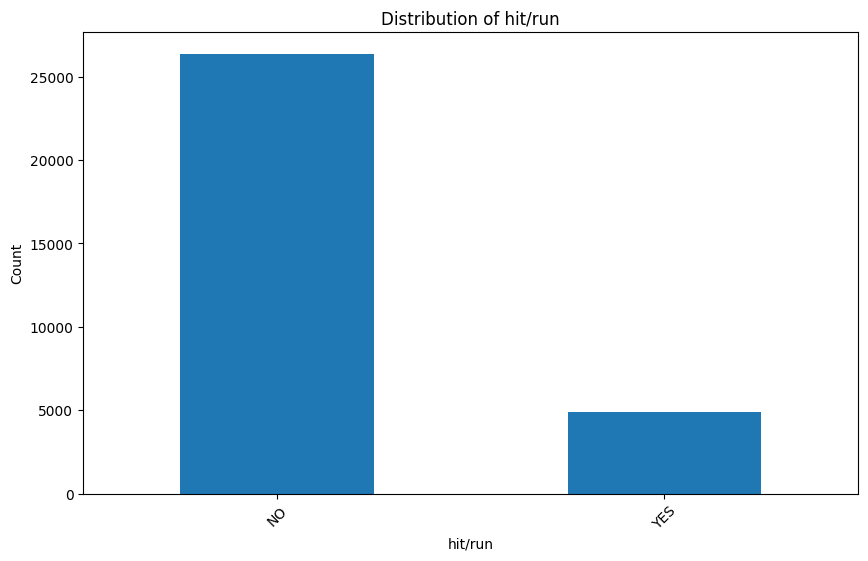

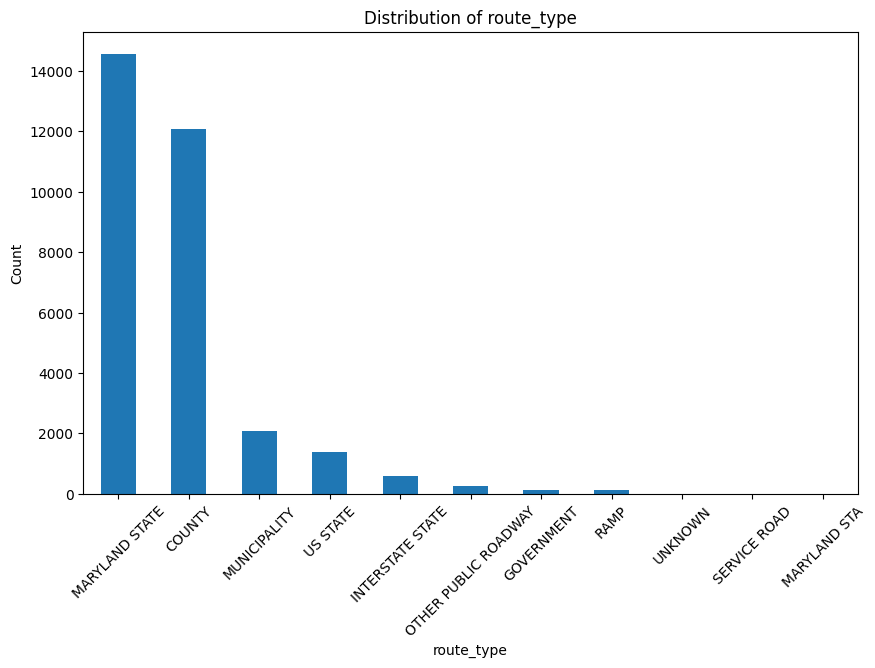

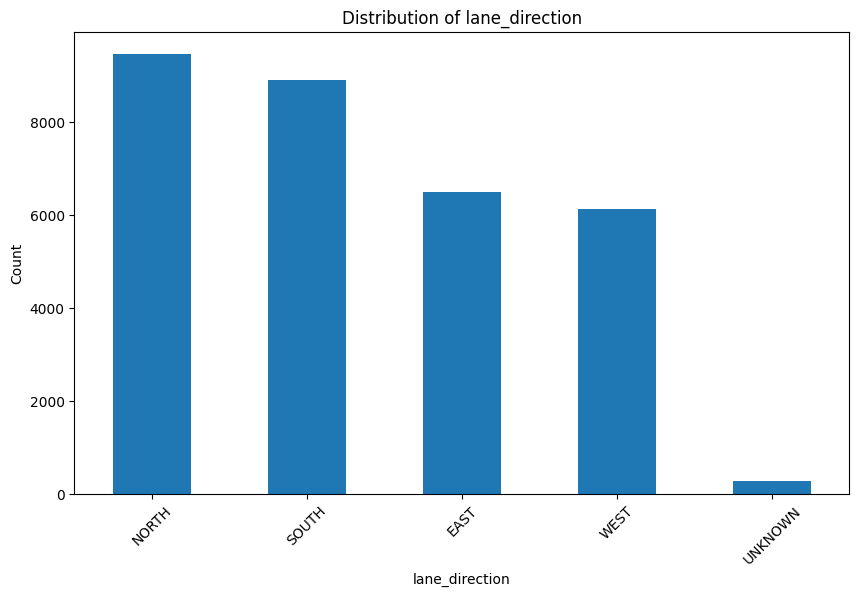

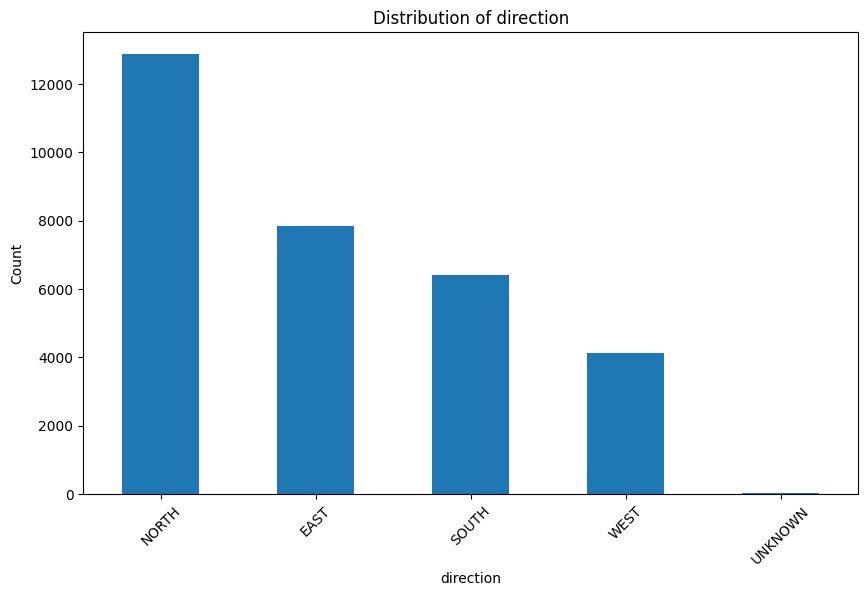

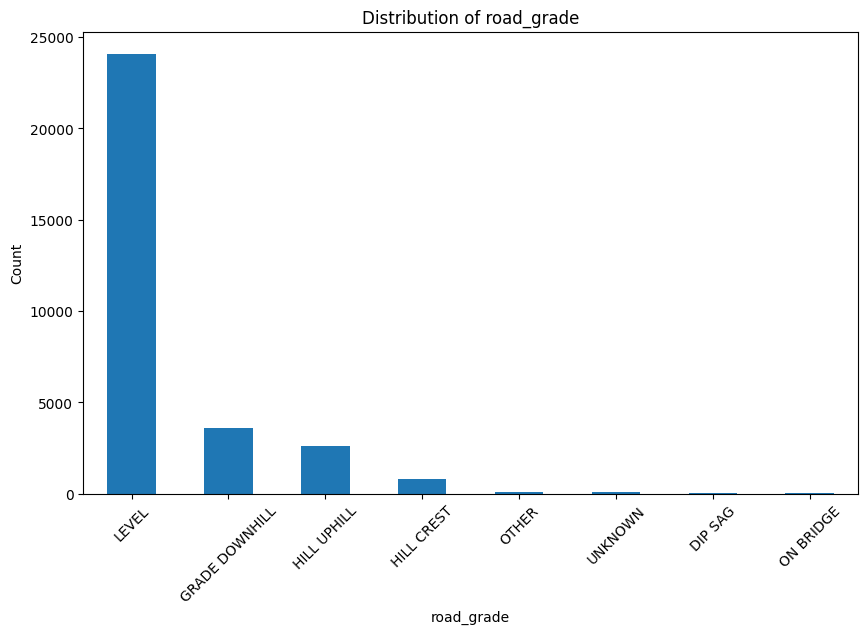

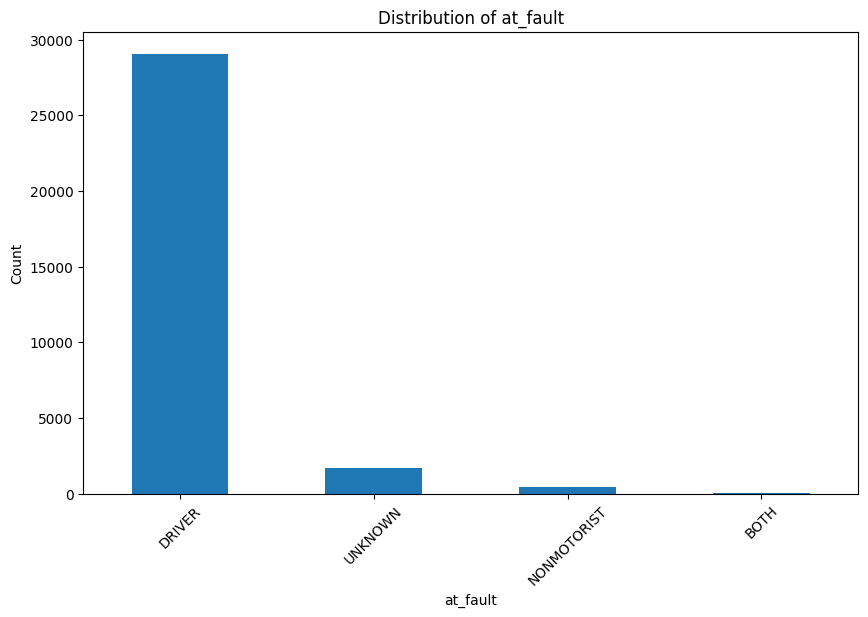

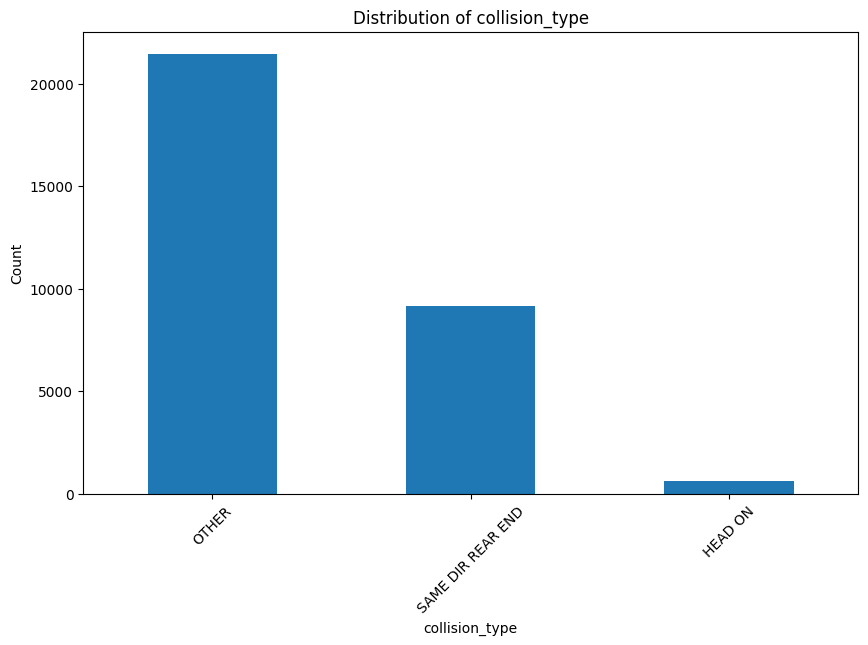

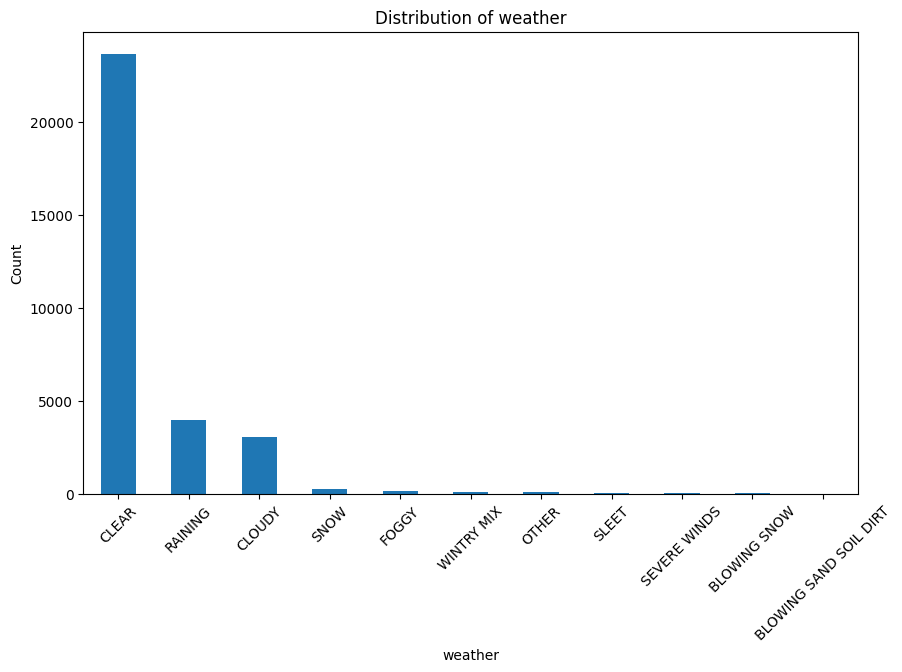

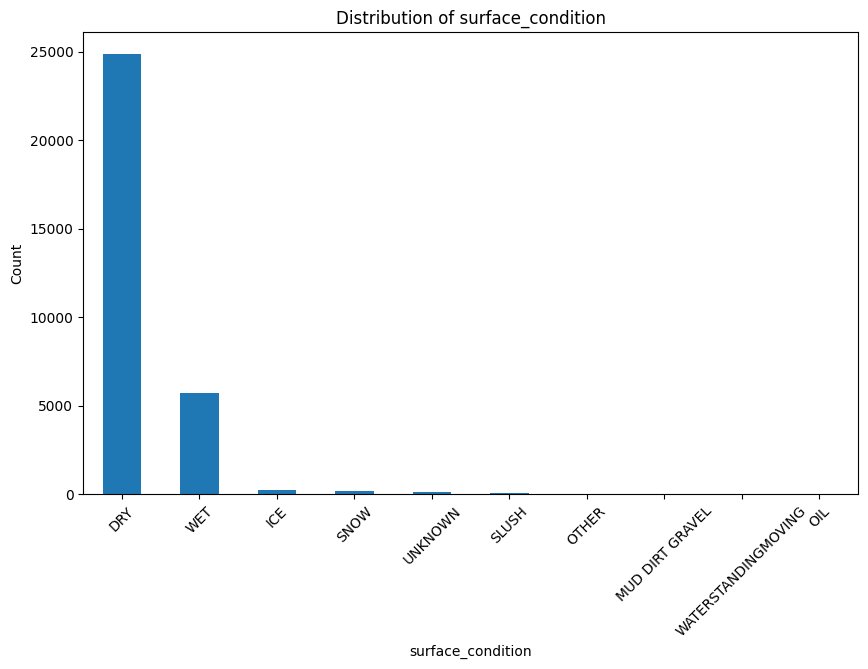

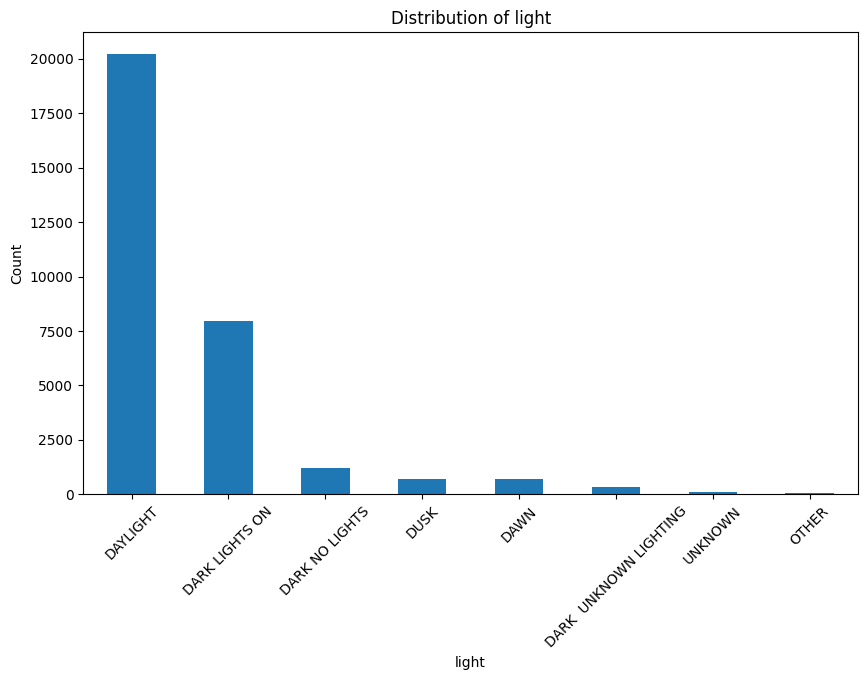

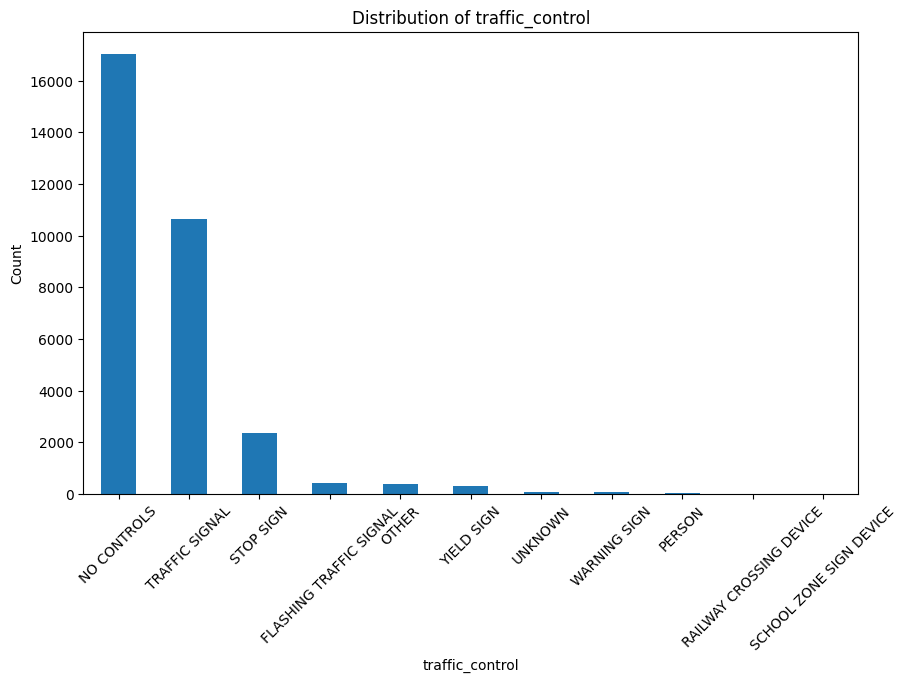

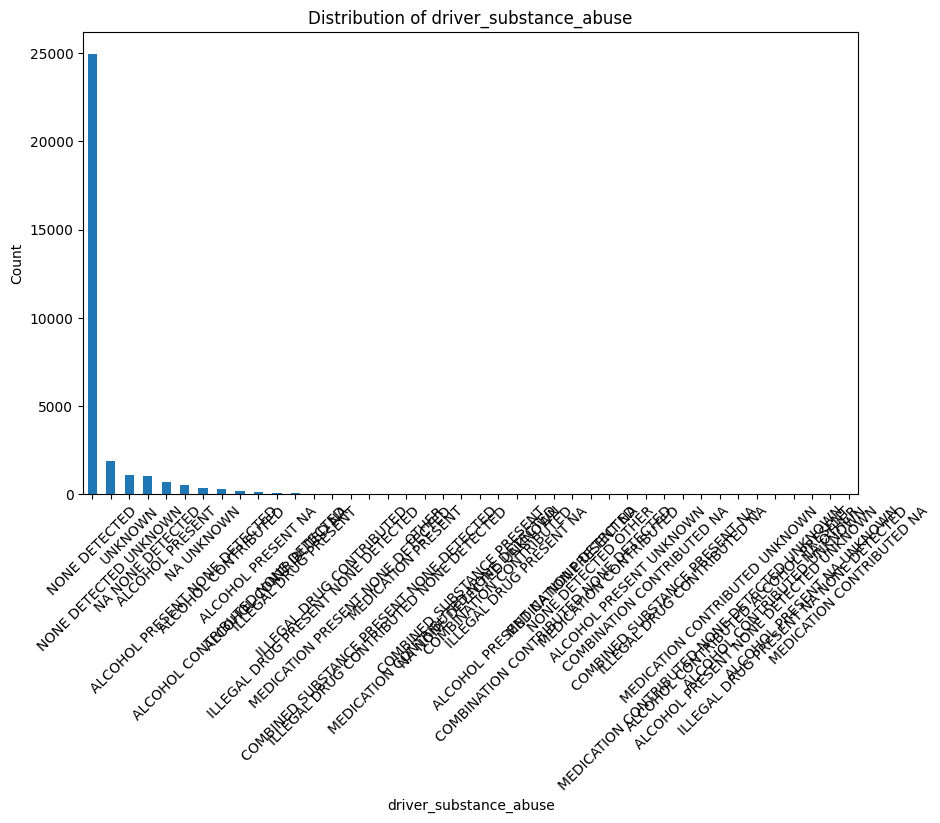

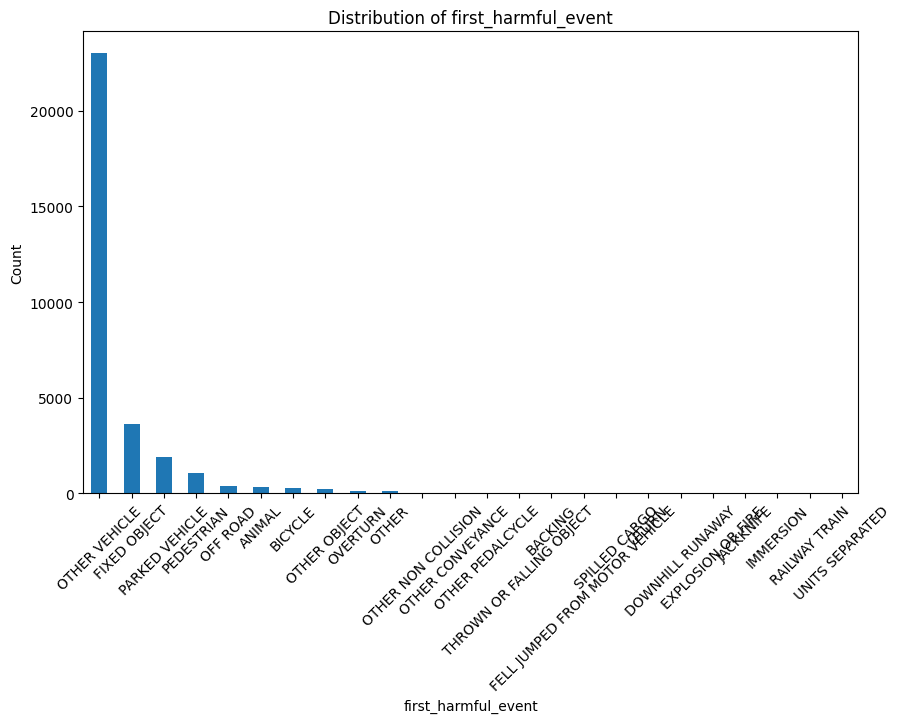

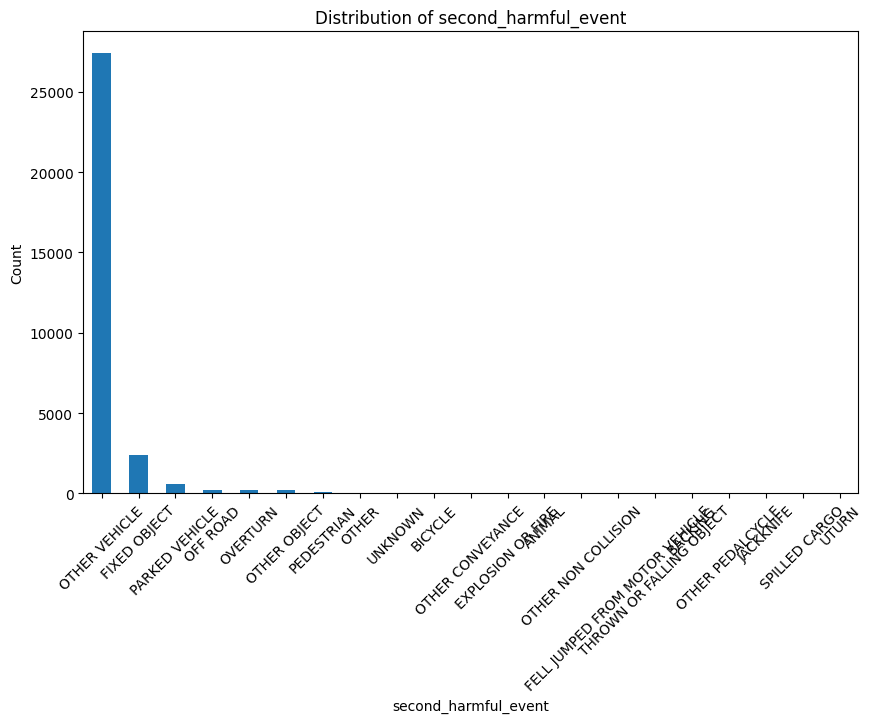

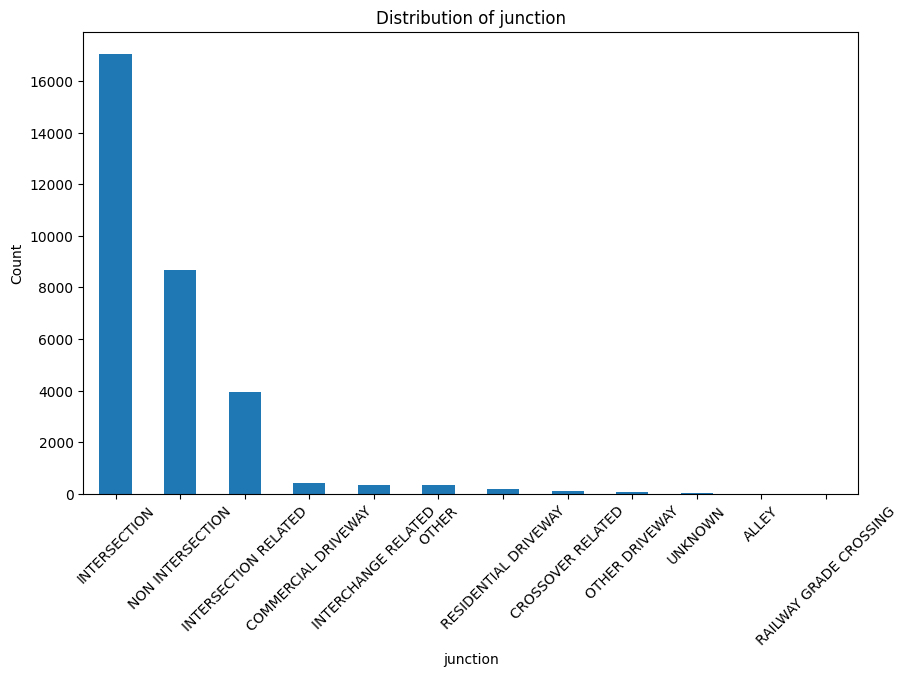

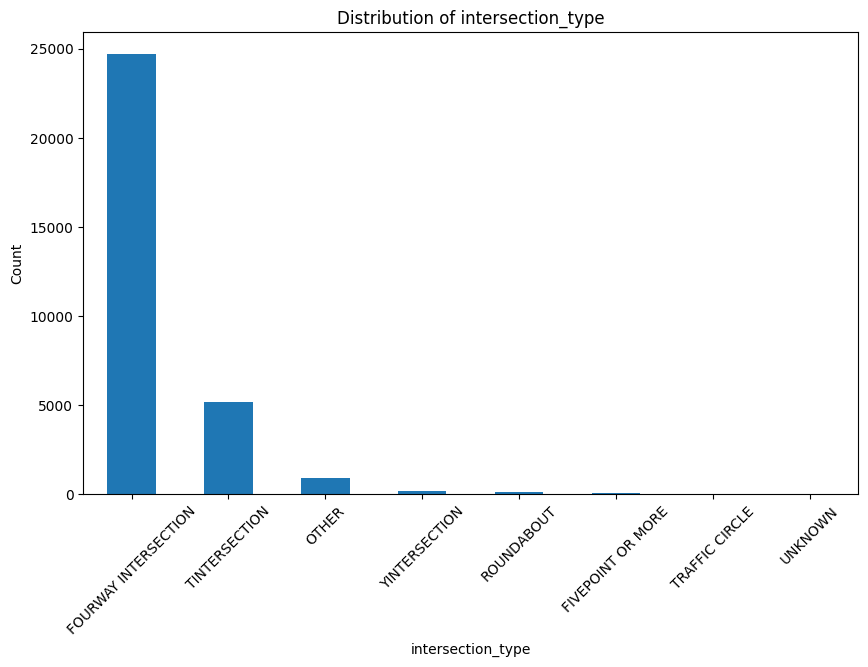

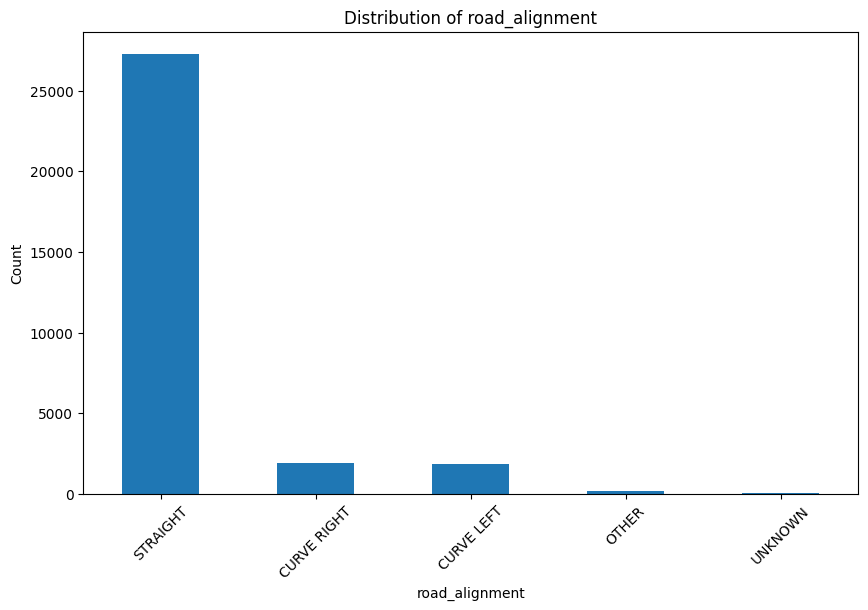

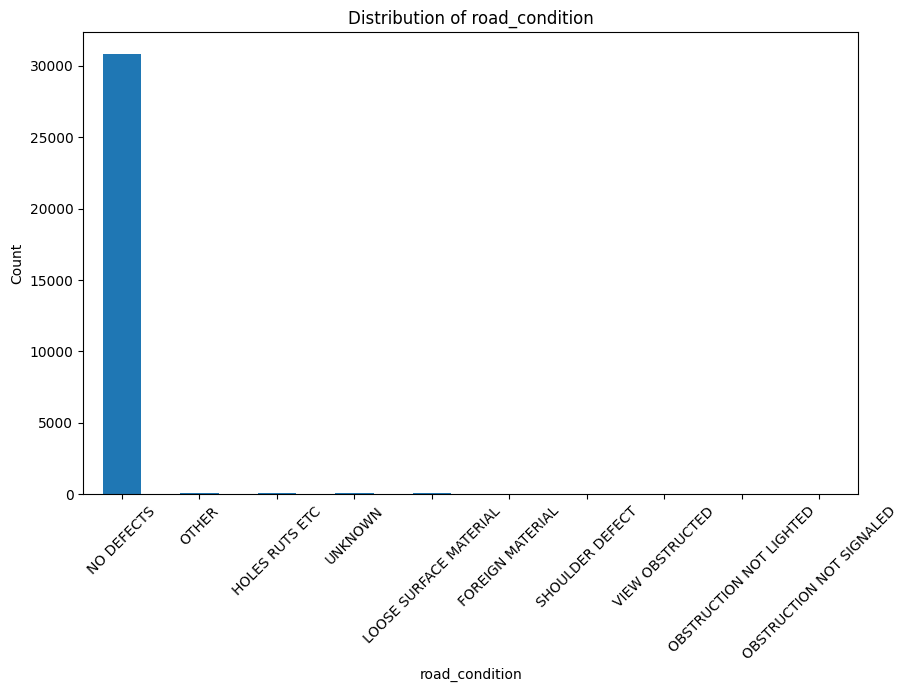

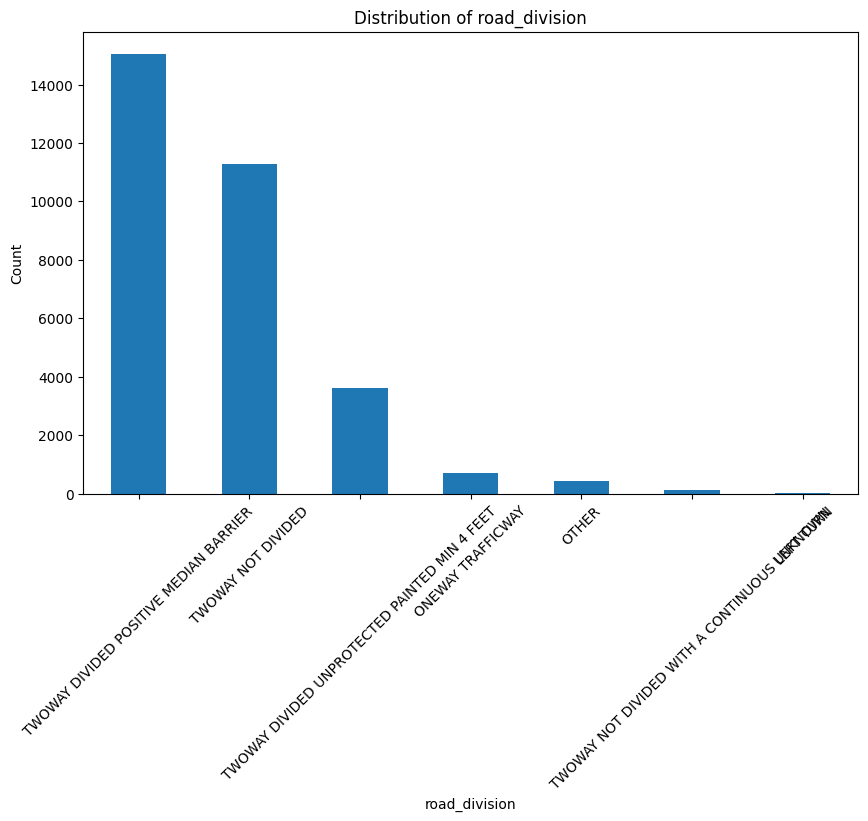

In [22]:
# Plot bar charts for categorical columns
cleaned_categorical_cols = df.select_dtypes(include=['object']).columns
for col in cleaned_categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


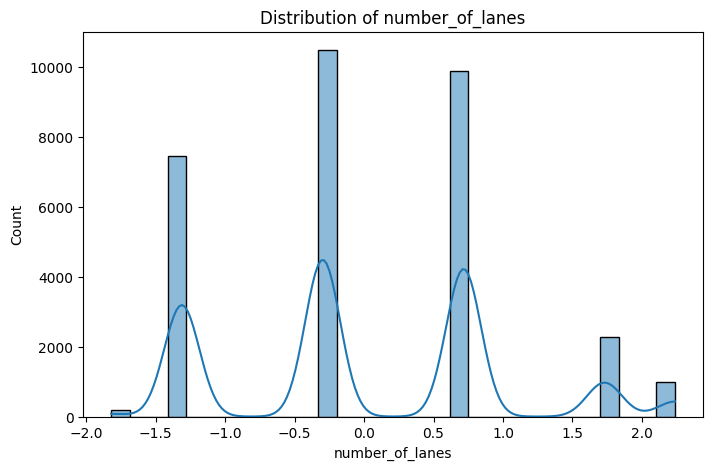

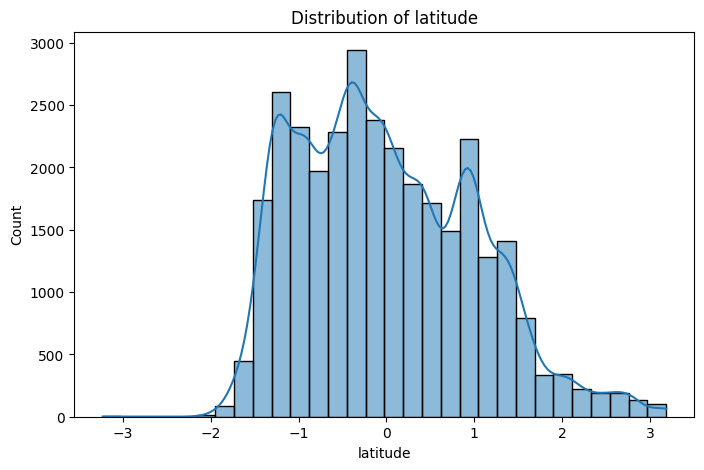

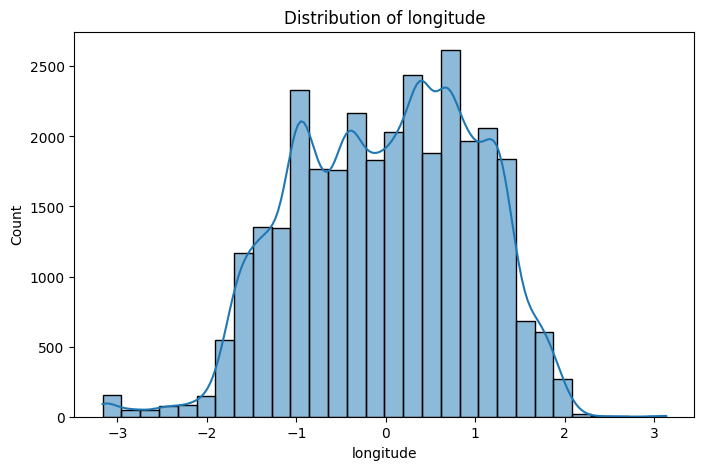

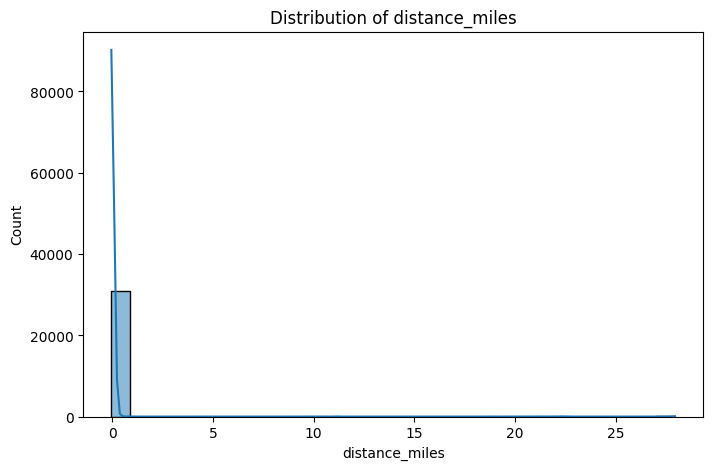

In [23]:
plt.ion()

for col in cleaned_numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [24]:
!pip install ace_tools

In [25]:
!pip install -U pip setuptools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [26]:
import pandas as pd
from sklearn.feature_selection import f_classif

# Prepare data for feature importance calculation
X = df.drop('first_harmful_event', axis=1)
y = df['first_harmful_event']

# Convert datetime columns to numeric (Unix timestamp) or drop them if unnecessary
for col in X.columns:
    if pd.api.types.is_datetime64_any_dtype(X[col]):
        # Convert datetime to timestamp
        X[col] = X[col].astype('int64') // 10**9

# Convert categorical variables to numerical form
X_encoded = pd.get_dummies(X, drop_first=True)

# Ensure all columns are numeric
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')

# Drop columns with NaN (resulting from failed conversions)
X_encoded = X_encoded.dropna(axis=1)

# Calculate F-value and p-value
f_values, p_values = f_classif(X_encoded, y)

# Create a DataFrame for easy interpretation
importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'F-value': f_values, 'p-value': p_values})

# Sort by importance
importance_df.sort_values(by='F-value', ascending=False, inplace=True)

# Display the feature importance
print("Feature Importance with F-values and P-values")
print(importance_df)


Feature Importance with F-values and P-values
                                               Feature     F-value  p-value
42                                at_fault_NONMOTORIST  481.192371      0.0
41                                     at_fault_DRIVER  369.025263      0.0
43                                    at_fault_UNKNOWN  254.890753      0.0
135                 second_harmful_event_OTHER VEHICLE  173.671087      0.0
72                         traffic_control_NO CONTROLS  171.656183      0.0
..                                                 ...         ...      ...
104  driver_substance_abuse_ILLEGAL DRUG PRESENT NA...    0.015626      1.0
89   driver_substance_abuse_ALCOHOL PRESENT NA UNKNOWN    0.015626      1.0
100  driver_substance_abuse_ILLEGAL DRUG CONTRIBUTE...    0.015626      1.0
82   driver_substance_abuse_ALCOHOL CONTRIBUTED ALC...    0.015626      1.0
91   driver_substance_abuse_ALCOHOL PRESENT NONE DE...    0.015626      1.0

[180 rows x 3 columns]


<ipython-input-27-bc3b5f5a9089>:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


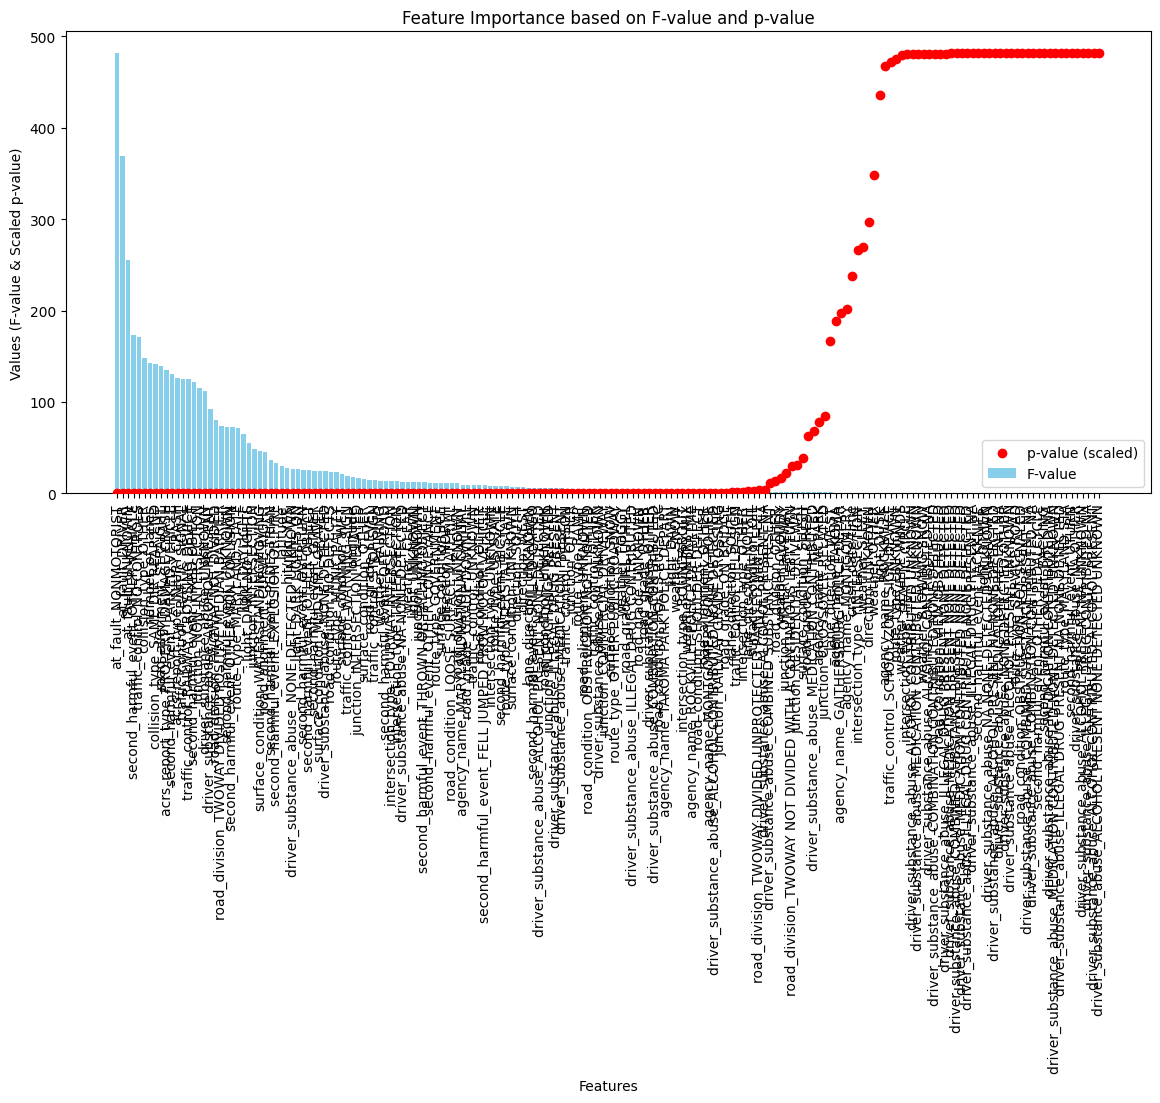

In [27]:
import matplotlib.pyplot as plt

# Plotting F-values and p-values for all features
plt.figure(figsize=(14, 6))

# Sort features by F-value for better visualization
sorted_df = importance_df.sort_values(by='F-value', ascending=False)

# Plot F-values
plt.bar(sorted_df['Feature'], sorted_df['F-value'], color='skyblue', label='F-value')

# Overlay p-values as red dots
plt.scatter(sorted_df['Feature'], sorted_df['p-value'] * max(sorted_df['F-value']), color='red', label='p-value (scaled)', zorder=5)

plt.xlabel('Features')
plt.ylabel('Values (F-value & Scaled p-value)')
plt.title('Feature Importance based on F-value and p-value')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

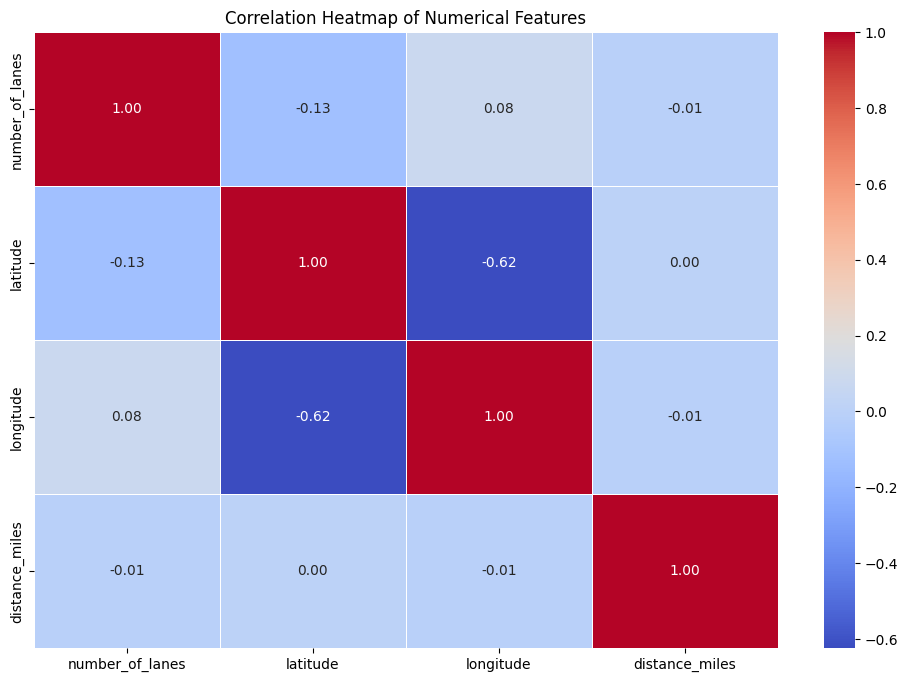

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


<ipython-input-10-8e7a52eb7e03>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[col].fillna(self.df[col].median(), inplace=True)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


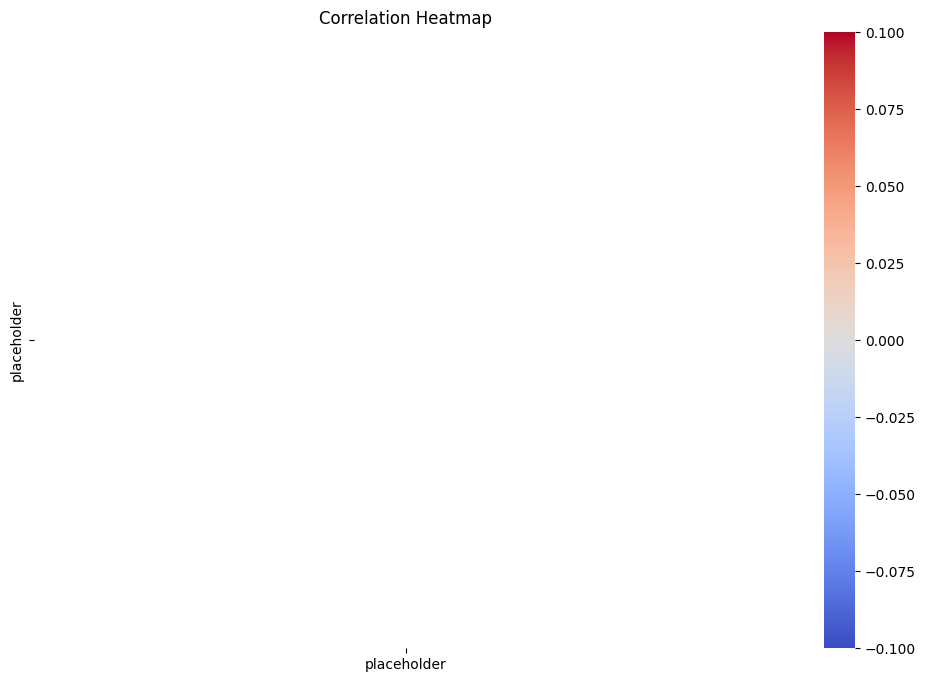

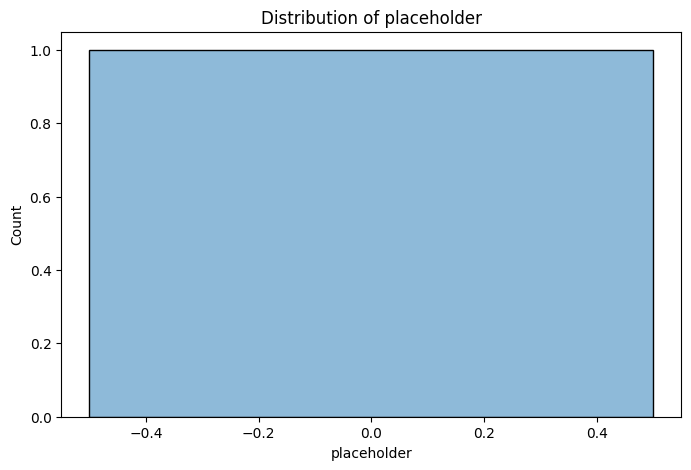

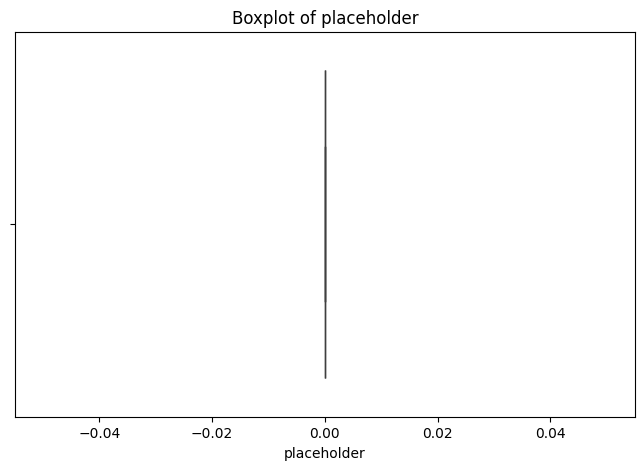

In [10]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import re
# import seaborn as sns
# import matplotlib.pyplot as plt

# class DataCleanerWithPlots:
#     def __init__(self, df):
#         self.df = df.copy()

#     def handle_missing_values(self):
#         categorical_cols = self.df.select_dtypes(include=['object']).columns
#         numerical_cols = self.df.select_dtypes(include=['number']).columns
#         for col in categorical_cols:
#             self.df[col].fillna(self.df[col].mode()[0], inplace=True)
#         for col in numerical_cols:
#             self.df[col].fillna(self.df[col].median(), inplace=True)
#         return self

#     def remove_duplicates(self):
#         self.df.drop_duplicates(inplace=True)
#         return self

#     def correct_data_types(self):
#         if 'crash_date/time' in self.df.columns:
#             self.df['crash_date/time'] = pd.to_datetime(self.df['crash_date/time'], errors='coerce')
#         return self

#     def handle_outliers(self):
#         numerical_cols = self.df.select_dtypes(include=['number']).columns
#         for col in numerical_cols:
#             Q1 = self.df[col].quantile(0.25)
#             Q3 = self.df[col].quantile(0.75)
#             IQR = Q3 - Q1
#             lower_bound = Q1 - 1.5 * IQR
#             upper_bound = Q3 + 1.5 * IQR
#             self.df[col] = self.df[col].clip(lower_bound, upper_bound)
#         return self

#     def normalize_numerical_features(self):
#         numerical_cols = self.df.select_dtypes(include=['number']).columns
#         scaler = StandardScaler()
#         self.df[numerical_cols] = scaler.fit_transform(self.df[numerical_cols])
#         return self

#     def clean_text(self):
#         text_cols = self.df.select_dtypes(include=['object']).columns
#         for col in text_cols:
#             self.df[col] = self.df[col].str.upper().str.strip()
#             self.df[col] = self.df[col].apply(lambda x: re.sub(r'[^A-Z0-9\s]', '', x))
#         return self

#     def apply_custom_rules(self):
#         if 'weather' in self.df.columns:
#             self.df['weather'] = self.df['weather'].replace({'UNK': 'CLEAR', 'UNKNOWN': 'CLEAR'})
#         if 'collision_type' in self.df.columns:
#             known_collision_types = {'SAME DIR REAR END', 'ANGLE', 'HEAD ON', 'SIDESWIPE', 'FIXED OBJECT'}
#             self.df['collision_type'] = self.df['collision_type'].apply(
#                 lambda x: x if x in known_collision_types else 'OTHER'
#             )
#         return self

#     def generate_correlation_heatmap(self):
#         plt.figure(figsize=(12, 8))
#         sns.heatmap(self.df.corr(numeric_only=True), annot=True, cmap='coolwarm')
#         plt.title('Correlation Heatmap')
#         plt.show()
#         return self

#     def generate_additional_plots(self):
#         numerical_cols = self.df.select_dtypes(include=['number']).columns
#         for col in numerical_cols:
#             plt.figure(figsize=(8, 5))
#             sns.histplot(self.df[col], kde=True)
#             plt.title(f'Distribution of {col}')
#             plt.show()
#         for col in numerical_cols:
#             plt.figure(figsize=(8, 5))
#             sns.boxplot(x=self.df[col])
#             plt.title(f'Boxplot of {col}')
#             plt.show()
#         categorical_cols = self.df.select_dtypes(include=['object']).columns
#         for col in categorical_cols:
#             plt.figure(figsize=(10, 6))
#             self.df[col].value_counts().plot(kind='bar')
#             plt.title(f'Distribution of {col}')
#             plt.xticks(rotation=45)
#             plt.show()
#         if len(numerical_cols) > 1:
#             sns.pairplot(self.df[numerical_cols])
#             plt.suptitle('Pair Plot of Numerical Features', y=1.02)
#             plt.show()
#         for col in categorical_cols:
#             plt.figure(figsize=(10, 6))
#             sns.countplot(y=self.df[col], order=self.df[col].value_counts().index)
#             plt.title(f'Count Plot of {col}')
#             plt.show()
#         return self

#     def clean_data(self):
#         return (
#             self.handle_missing_values()
#             .remove_duplicates()
#             .correct_data_types()
#             .handle_outliers()
#             .normalize_numerical_features()
#             .clean_text()
#             .apply_custom_rules()
#         )

#     def get_cleaned_data(self):
#         return self.df

# df = pd.DataFrame({'placeholder': [1]})
# plot_cleaner = DataCleanerWithPlots(df)
# plot_cleaner.clean_data().generate_correlation_heatmap().generate_additional_plots()
# cleaned_df_with_plots = plot_cleaner.get_cleaned_data()
# cleaned_df_with_plots.to_csv('/content/drive/MyDrive/Project/cleaned_crash_incidents_dataset.csv', index=False)
